In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gpflow.utilities import print_summary, set_trainable, to_default_float
import gpflow
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

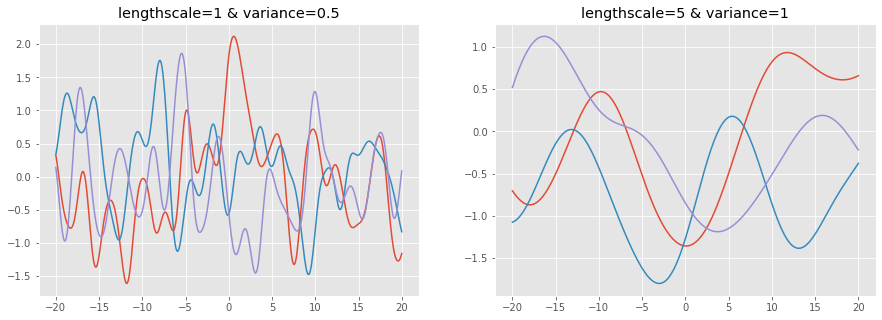

In [67]:
kernel1 = gpflow.kernels.RBF(lengthscales=1, variance=0.5)
kernel2 = gpflow.kernels.RBF(lengthscales=5, variance=1)
xx = np.linspace(-20, 20, 500)[:, None]
K1 = kernel1(xx)
K2 = kernel2(xx)
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(xx, np.random.multivariate_normal(np.zeros(500), K1, 3).T)
ax[0].set_title('lengthscale=1 & variance=0.5')
ax[1].plot(xx, np.random.multivariate_normal(np.zeros(500), K2, 3).T)
ax[1].set_title('lengthscale=5 & variance=1')
plt.savefig('../plots/rbf_samples.pdf')

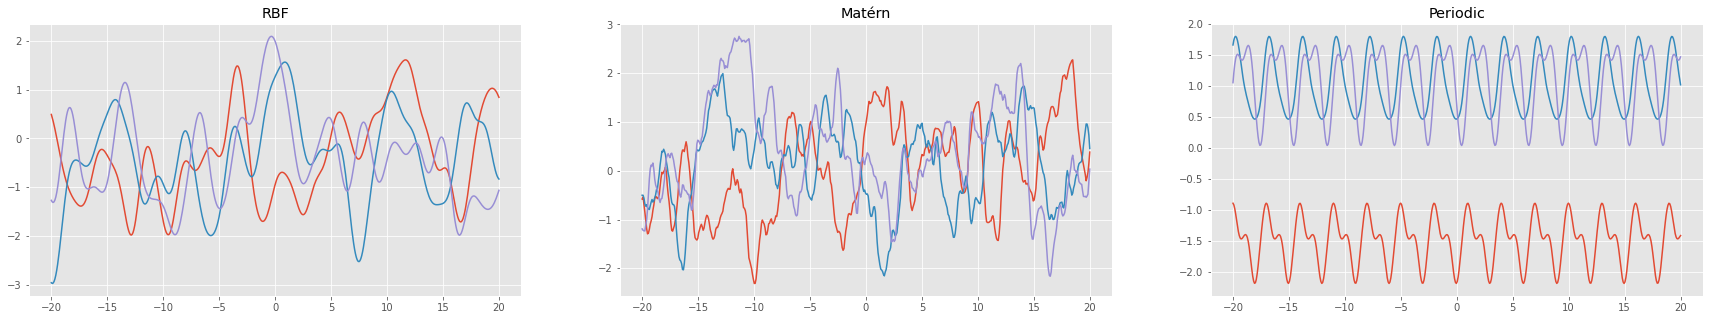

In [66]:
kernel1 = gpflow.kernels.RBF()
kernel2 = gpflow.kernels.Matern32()
kernel3 = gpflow.kernels.Periodic(gpflow.kernels.RBF(), period=3)
xx = np.linspace(-20, 20, 500)[:, None]
K1 = kernel1(xx)
K2 = kernel2(xx)
K3 = kernel3(xx)
plt.style.use('ggplot')
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(30,5))
ax1.plot(xx, np.random.multivariate_normal(np.zeros(500), K1, 3).T)
ax1.set_title('RBF')
ax2.plot(xx, np.random.multivariate_normal(np.zeros(500), K2, 3).T)
ax2.set_title('Matérn')
ax3.plot(xx, np.random.multivariate_normal(np.zeros(500), K3, 3).T)
ax3.set_title('Periodic')
plt.savefig('../plots/kernel_samples.pdf')